<a href="https://colab.research.google.com/github/VinLucero/OmniXAI/blob/main/PiML_explainable_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installs
If necessary:
- Run once
- Then restart Kernel
- Then run next cell and continue

In [ ]:
!pip install piml # so many dependencies ...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 13.8 MB/s 

Imports

In [ ]:
from piml import Experiment # Experiment is main class of PiML
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

# CVXPY exceptions are expected

(CVXPY) Jul 09 02:44:34 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 09 02:44:34 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


#### Initialize PiML

In [ ]:
exp = Experiment()

#### Load Taiwan Credit data

In [ ]:
exp.data_loader(data='TaiwanCredit')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,3.592621,3.491782,2.838849,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,3.428621,3.237041,3.428621,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465977,4.146996,4.132260,4.156307,4.174612,4.191731,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672015,4.683353,4.692776,4.452016,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.935406,3.753660,4.554319,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5.276345,5.285143,5.318827,4.944507,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,3.226342,3.262214,3.544440,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3.552181,3.525951,3.440752,4.319710,4.313509,4.286861,0.000000,0.000000,4.342442,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-3.216430,4.894205,4.882553,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


#### Descriptive stats and basic data preparation
* Remove `AGE`, `SEX`, `EDUCATION` and `MARRIAGE`

In [ ]:
exp.data_summary(feature_exclude=['AGE', 'SEX', 'EDUCATION', 'MARRIAGE'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,name,n_missing,mean,std,min,q1,median,q3,max
0,LIMIT_BAL,0,167484.3227,129747.6616,10000.0000,50000.0000,140000.0000,240000.0000,1000000.0000
1,AGE,0,35.4855,9.2179,21.0000,28.0000,34.0000,41.0000,79.0000
2,PAY_1,0,0.1672,0.9313,-1.0000,0.0000,0.0000,0.0000,8.0000
3,PAY_2,0,0.1184,0.9658,-1.0000,0.0000,0.0000,0.0000,8.0000
4,PAY_3,0,0.1061,0.9509,-1.0000,0.0000,0.0000,0.0000,8.0000
5,PAY_4,0,0.0692,0.9116,-1.0000,0.0000,0.0000,0.0000,8.0000
6,PAY_5,0,0.0369,0.8646,-1.0000,0.0000,0.0000,0.0000,8.0000
7,PAY_6,0,0.0352,0.8679,-1.0000,0.0000,0.0000,0.0000,8.0000
8,BILL_AMT1,0,3.8860,1.5470,-5.2190,3.5514,4.3499,4.8267,5.9843
9,BILL_AMT2,0,3.7954,1.6545,-4.8437,3.4751,4.3264,4.8062,5.9930


Data Shape:(30000, 24)


#### Assign default modeling roles and train/validation split

In [ ]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Select features based on randomized conditional independence test (RCIT)
* Basic causal discovery
* RCIT uses properties of Fourier features to calculate independence tests without expensive eigen decompositions or matrix inversions
* RCIT is paired with forward and backward selection passes
* Goal is to find a minimal set of features with maximum predictive power (Markov boundary set)
* Can be slow ...



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

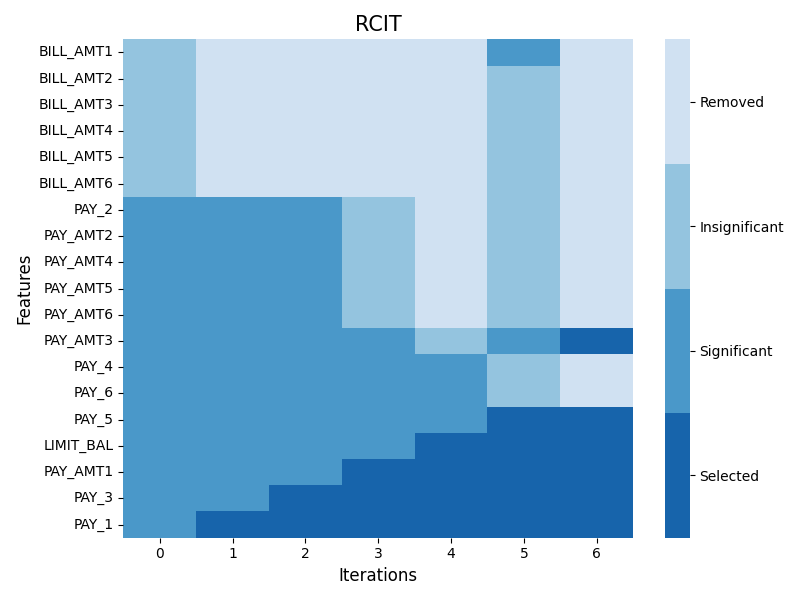

In [ ]:
exp.feature_select(method='rcit')

#### View selected features

In [ ]:
exp.get_feature_names()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

['LIMIT_BAL', 'PAY_1', 'PAY_3', 'PAY_5', 'PAY_AMT1', 'PAY_AMT3']

#### View Spearman correlation for monotonicity constraints

In [ ]:
train_x = pd.DataFrame(exp.get_raw_data()[0], columns=exp.get_raw_data()[6]) # X
train_y = pd.DataFrame(exp.get_raw_data()[1], columns=[exp.get_raw_data()[7]]) # y
pd.concat([train_x, train_y], axis=1).corr(method='spearman').iloc[0:6, -1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

LIMIT_BAL   -0.164743
PAY_1        0.301563
PAY_3        0.228218
PAY_5        0.197430
PAY_AMT1    -0.160398
PAY_AMT3    -0.135545
Name: FlagDefault, dtype: float64

#### Train and register models:
* GLM
* GAM
* EBM
* Monotonic XGB2
  * Positive constraints: "PAY_1", "PAY_3", "PAY_5"
  * Negative constraints: "LIMIT_BAL", "PAY_AMT1", "PAY_AMT3"


In [ ]:
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

#### Extract GLM predictions

In [ ]:
id = pd.DataFrame(np.arange(0, 24000), columns=['ID']) # include ID for better traceability
glm = exp.get_model('GLM') # get GLM model from experiment object
glm_phat = pd.DataFrame(glm.predict_proba(train_x.values)[:, 1].reshape(24000, 1), columns=[str('p_' + exp.get_raw_data()[7])]) # phat
glm_train_phat = pd.concat([id, train_x, train_y, glm_phat], axis=1)
glm_train_phat

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,LIMIT_BAL,PAY_1,PAY_3,PAY_5,PAY_AMT1,PAY_AMT3,FlagDefault,p_FlagDefault
0,0,20000.0,0.0,2.0,0.0,3.477266,3.000434,0.0,0.261295
1,1,260000.0,-1.0,-1.0,-1.0,2.220108,2.220108,0.0,0.071186
2,2,20000.0,2.0,0.0,0.0,3.176381,2.954725,1.0,0.450111
3,3,30000.0,2.0,2.0,2.0,3.255514,3.352375,1.0,0.632888
4,4,10000.0,0.0,0.0,0.0,3.447313,3.176381,1.0,0.191187
...,...,...,...,...,...,...,...,...,...
23995,23995,30000.0,0.0,0.0,0.0,3.322426,3.000434,0.0,0.191524
23996,23996,210000.0,0.0,0.0,0.0,3.845160,3.845160,1.0,0.137878
23997,23997,130000.0,0.0,0.0,0.0,3.699057,3.398114,0.0,0.159425
23998,23998,50000.0,0.0,0.0,0.0,3.398114,2.621176,0.0,0.190885


#### Determine percentiles of GLM predictions for ICE plots and local explanations

In [ ]:
def get_percentile_dict(yhat_name, valid, id_):

    """ Returns the percentiles of a column, yhat_name, as the indices based on
        another column id_.

    :param yhat_name: Name of column in valid in which to find percentiles.
    :param valid: Pandas validation frame.
    :param id_: explicit id column in validation frame.

    :return: Dictionary of percentile values and index column values.

    """

    # create a copy of frame and sort it by yhat
    sort_df = valid.copy(deep=True)
    sort_df.sort_values(yhat_name, inplace=True)
    sort_df.reset_index(inplace=True)

    # find top and bottom percentiles
    percentiles_dict = {0: sort_df.loc[0, id_], 99: sort_df.loc[sort_df.shape[0] - 1, id_]}

    # find 10th-90th percentiles
    inc = sort_df.shape[0] // 10
    for i in range(1, 10):
        percentiles_dict[i * 10] = sort_df.loc[i * inc, id_]

    return percentiles_dict

glm_percentile_dict = get_percentile_dict('p_FlagDefault', glm_train_phat, 'ID')
sorted(glm_percentile_dict.items()) # sorted list of row numbers for local investigation

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[(0, 11250),
 (10, 2385),
 (20, 10582),
 (30, 3520),
 (40, 4739),
 (50, 20143),
 (60, 22513),
 (70, 17433),
 (80, 23578),
 (90, 5990),
 (99, 14502)]

#### Determine densities for important features

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

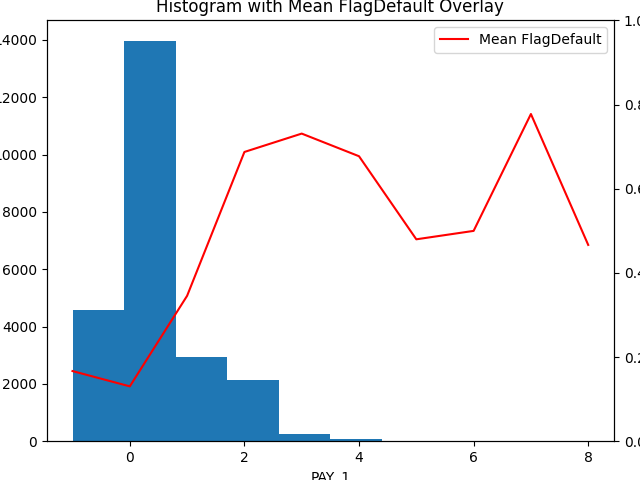

In [ ]:
def hist_mean(x_name, y_name, valid):

    """ Plots diagnostic plot of histogram with mean line overlay.

    :param x_name: Name of variable for which to plot ICE and partial dependence.
    :param y_name: Name of target variable.
    :param valid: Pandas validation frame.
    :param pd_ice_dict: Dict of Pandas DataFrames containing partial dependence
                        and ICE values.
    """

    # initialize figure and axis
    fig, ax = plt.subplots()
    plt.tight_layout()

    # create histogram
    mean_df = valid[[x_name, y_name]].groupby(by=x_name).mean()
    bins = sorted(valid[x_name].unique())

    # annotate hist
    ax.set_xlabel(x_name)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram with Mean ' + y_name + ' Overlay')
    ax.hist(valid[x_name])

    # create a new twin axis
    # on which to plot a line showing mean value
    # across hist bins
    ax1 = ax.twinx()
    _ = ax1.set_ylim((0, 1))
    _ = ax1.plot(bins, mean_df.reindex(labels=bins)[y_name], color='r')
    _ = ax1.set_ylabel('Mean ' + y_name)
    _ = ax1.legend(['Mean ' + y_name], loc=1)

hist_mean('PAY_1', 'FlagDefault', glm_train_phat)


#### Explain GLM
- FI: variance of the marginal effect
- Effect: is `beta_j*x_{i,j} - beta_0`, `weight is beta_j`
- Standardized coefficients
- Row `5990` is 90th percentile of GLM phat


In [ ]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# exp.model_explain() # for Session 3

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### View row to confirm index

In [ ]:
train_x.iloc[5990, :]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

LIMIT_BAL    60000.000000
PAY_1            1.000000
PAY_3            2.000000
PAY_5            2.000000
PAY_AMT1         3.477266
PAY_AMT3         3.699057
Name: 5990, dtype: float64

#### Explain GAM
- FI: Variance of shape function

In [ ]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# exp.model_explain() # for Session 3

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Explain EBM
- FI: sum of the effects of each feature over the main effect and all related pairwise interactions
- Effect: variance of shape function
- Local FI: sum of the effects of each feature over the main effect and all related pairwise interactions for a single observation

In [ ]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# exp.model_explain() # for Session 3

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Explain Constrained XGB2
- Also a GAM! See: https://proceedings.mlr.press/v108/lengerich20a.html
- FI: sum of the effects of each feature over the main effect and all related pairwise interactions
- Effect: variance of shape function
- Local FI: sum of the effects of each feature over the main effect and all related pairwise interactions for a single observation


In [ ]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# exp.model_explain() # for Session 3

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…